### 1) Web Scraping

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
baseurl = 'https://www.dfimoveis.com.br/'

In [3]:
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.63 Safari/537.36'}

In [4]:
r = requests.get('https://www.dfimoveis.com.br/aluguel/df/todos/asa-norte/apartamento')

In [5]:
soup = BeautifulSoup(r.content, 'lxml')

In [6]:
productlist = soup.find_all('li', class_ = 'property-list__item')

In [8]:
def dynamic_portion(soup):
    temp_data = {}
    for item in soup.findAll('h6',class_ ='mb-0 text-normal'):
        item = item.text.split(':')
        if len(item)==2:
            key,val = map(str.strip,item)
            temp_data[key]=val
    return temp_data 

productlinks = []
aps = []
baseurl = 'https://www.dfimoveis.com.br/'
for x in range(1,100):
  r = requests.get(f'https://www.dfimoveis.com.br/aluguel/df/brasilia/apartamento?pagina={x}')
  soup = BeautifulSoup(r.content, 'lxml')
  productlist = soup.find_all('li', class_ = 'property-list__item')
  for item in productlist:
    for link in item.find_all('meta',itemprop = 'url'):
        productlinks.append(baseurl + link['content'])

for link in productlinks:
    r = requests.get(link)
    soup = BeautifulSoup(r.content, 'lxml')
    name = soup.find_all('h1', class_ = 'mb-0 font-weight-600 fs-1-5')[0].text.strip()
    price = soup.find_all('small', class_ = 'display-5 text-warning')[2].text.strip()
    area = soup.find_all('small', class_ = 'display-5 text-warning')[0].text.replace("m²","").strip()
    valueperm2 = soup.find_all('small', class_ = 'display-5 text-warning')[1].text.strip()
    data = {'name':name,
            'link':link,
            'price':price,
            'area':area,
            'valueperm2':valueperm2
            }
    temp_data = dynamic_portion(soup)
    data.update(temp_data)
    print(data)
    aps.append(data)

{'name': "SQNW 311 Bloco D Atrium D'or - LINDO - ACONCHEGANTE!", 'link': 'https://www.dfimoveis.com.br/imovel/apartamento-1-quarto-aluguel-noroeste-brasilia-df-sqnw-311-bloco-d-393470', 'price': '2.600', 'area': '32,00', 'valueperm2': '81', 'Quartos': '1', 'Suítes': '1', 'Garagens': '1', 'Condomínio R$': '350', 'Cidade': 'BRASÍLIA - NOROESTE', 'Posição do Sol': 'Perpendicular', 'Posição do Imóvel': 'Lateral', 'Andar do Apartamento': '10° Andar'}
{'name': 'CCSW 1   - ED. PORTAL MASTER', 'link': 'https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-ccsw-1-345005', 'price': '3.600', 'area': '26,00', 'valueperm2': '138', 'Quartos': '1', 'Suítes': '1', 'Garagens': '1', 'Condomínio R$': '409', 'Cidade': 'BRASÍLIA - SUDOESTE', 'Nome do Edifício': 'ED. PORTAL MASTER'}
{'name': 'SEPS 713/913', 'link': 'https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-sul-brasilia-df-seps-713-913-207972', 'price': '1.600', 'area': '26,00', 'valueperm2': '61', 'Quartos':

In [9]:
import pandas as pd
df = pd.DataFrame(aps)

In [11]:
df.to_csv('data.csv', encoding='utf-8')

### 2) Pré-processamento dos dados

In [1037]:
df = pd.read_csv('data.csv',encoding='utf-8')

In [1038]:
df.price.replace('\.','', regex=True,inplace=True)
df.price = df.price.astype(int)

In [1039]:
df.area = df.area.str.split(',').str[0]

In [1040]:
df.area.replace('\.','', regex=True,inplace=True)
df.area = df.area.astype(int)

In [1041]:
df.drop(df[df.area > 2000].index, inplace=True)
df.drop(df[df.area == 0].index, inplace=True)

In [1042]:
df.area.describe()

count    1881.000000
mean       71.928761
std        64.164791
min         1.000000
25%        30.000000
50%        50.000000
75%        92.000000
max      1100.000000
Name: area, dtype: float64

In [1043]:
df.loc[df['area'] > 1000,'area'] = df['area']/10

In [1044]:
df.loc[df['area'] == 900] 

,Unnamed: 0,name,link,price,area,valueperm2,Quartos,Suítes,Garagens,Condomínio R$,...,Posição do Imóvel,Andar do Apartamento,Nome do Edifício,IPTU R$,Total de Andar do Empreendimento,Área Total,Aceita Financiamento,Unidades no Andar,Área Terreno,Aceita Permuta
237,237,SQS 211 Bloco I,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-sul-brasilia-df-sqs-211-bloco-i-579804,45000,900,50.0,4.0,4.0,3.0,6.0,...,NaN,6° Andar,NaN,12.0,7 Andares,"900,00 m²",NaN,2.0,NaN,NaN


In [1045]:
df['Condomínio R$'].describe() #vamos ter que preencher os vazios

count    1675.000000
mean      368.421844
std       281.650447
min         0.000000
25%       150.000000
50%       351.000000
75%       554.000000
max       995.000000
Name: Condomínio R$, dtype: float64

In [1046]:
df['IPTU R$'].describe()

count    1104.000000
mean      226.818698
std       266.436879
min         0.000000
25%         2.880000
50%       135.500000
75%       312.500000
max       994.000000
Name: IPTU R$, dtype: float64

In [1047]:
df['Suítes'].describe() #aqui vamos ter que pensar como preencher os vazios, pode ser que sejam 0 ou missing mesmo

count    847.000000
mean       1.291617
std        0.715392
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        5.000000
Name: Suítes, dtype: float64

In [1048]:
df['setor'] = df.name.str.split(' ').str[0]
df.loc[df['setor'] == 'SGAN\xa0911','setor'] = 'SGAN'
df.loc[df['Cidade'] == 'BRASÍLIA - VILA PLANALTO','setor'] = 'Vila Planalto'
df.loc[df['setor'] == 'Área','setor'] = 'AOS'

<AxesSubplot:xlabel='setor', ylabel='count'>

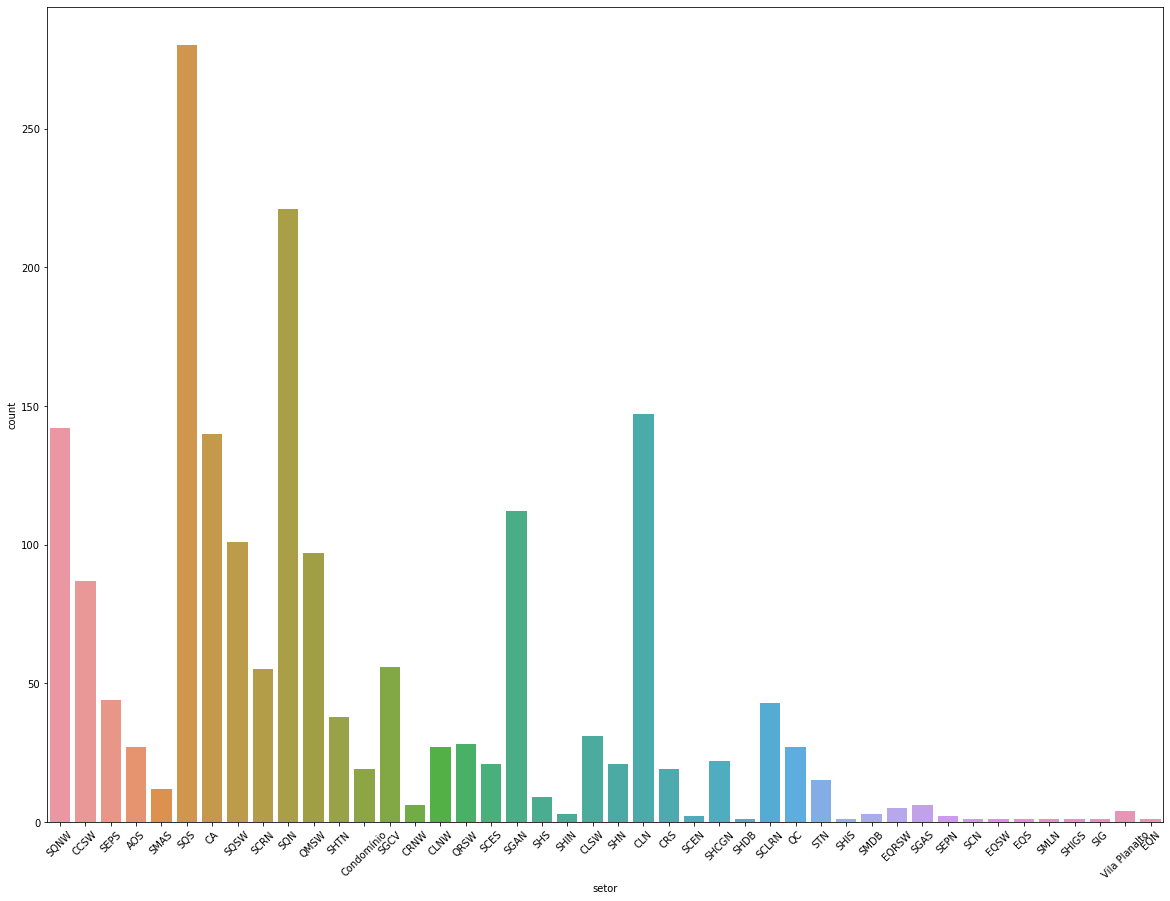

In [1049]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (20,15))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'setor')

In [1050]:
columns = ['Unnamed: 0','valueperm2','Posição do Sol','Posição do Imóvel','Andar do Apartamento','Total de Andar do Empreendimento',
'Nome do Edifício','Área Total','Aceita Financiamento','Área Terreno','Unidades no Andar','Aceita Permuta']
df.drop(columns=columns,inplace=True)

In [1051]:
df.loc[df['IPTU R$'] < 3,'IPTU R$'] = df['IPTU R$']*1000
df.loc[df['Condomínio R$'] < 3,'Condomínio R$'] = df['Condomínio R$']*1000

In [1052]:
pd.set_option('display.max_colwidth', None)

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor
6,SQNW 109,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-noroeste-brasilia-df-sqnw-109-553002,10900,148,4.0,2.0,4.0,1648.0,BRASÍLIA - NOROESTE,4.219,SQNW
14,SCRN 714/715 Bloco B entrada 36 apto 401,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-scrn-714-715-bloco-b-590574,1100,32,1.0,1.0,NaN,NaN,BRASÍLIA - ASA NORTE,115.000,SCRN
15,CCSW 4 Lote 2 Bloco B,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-ccsw-4-lote-2-bloco-b-425524,1350,37,1.0,1.0,1.0,413.0,BRASÍLIA - SUDOESTE,266.000,CCSW
16,SMAS Living Park Sul - The Union,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-park-sul-brasilia-df-smas-538579,4200,73,2.0,1.0,2.0,912.0,BRASÍLIA - PARK SUL,931.000,SMAS
17,SQS 204,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-asa-sul-brasilia-df-sqs-204-567332,3600,120,3.0,1.0,1.0,1150.0,BRASÍLIA - ASA SUL,225.000,SQS
19,SQSW 104 Bloco C,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-sudoeste-brasilia-df-sqsw-104-bloco-c-330917,6500,144,3.0,NaN,NaN,1404.0,BRASÍLIA - SUDOESTE,309.000,SQSW
22,AOS 08 Bloco C,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-octogonal-brasilia-df-aos-08-bloco-c-121825,2500,68,2.0,NaN,1.0,729.0,BRASÍLIA - OCTOGONAL,117.000,AOS
24,SQSW 504 Bloco I,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-sudoeste-brasilia-df-sqsw-504-bloco-i-56274,3200,85,2.0,1.0,1.0,743.0,BRASÍLIA - SUDOESTE,139.000,SQSW
26,QMSW 5 Lote 2 Bloco A,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-qmsw-5-lote-2-bloco-a-74224,1200,24,1.0,NaN,1.0,267.0,BRASÍLIA - SUDOESTE,64.000,QMSW
27,CCSW 4,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-ccsw-4-132875,1200,25,1.0,NaN,1.0,432.0,BRASÍLIA - SUDOESTE,343.000,CCSW


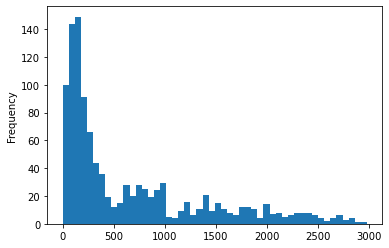

In [1053]:
df['IPTU R$'].plot(kind='hist', bins = 50)
df.loc[df['IPTU R$'] <1000].head(50) #da pra ver que os iptus mensais puxam uma cauda pra esquerda na distribuição

In [1054]:
df['iptuvsarea'] = df['IPTU R$']/df.area #criar o indicador pra verificar possíveis descrepancias nos iptus que vem o total/o mensal

In [1055]:
df.loc[df['iptuvsarea'] < 10] #quando cortamos os menores que 10 parece claramente ser o caso dos pagamentos de iptu mensal

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea
6,SQNW 109,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-noroeste-brasilia-df-sqnw-109-553002,10900,148,4.0,2.0,4.0,1648.0,BRASÍLIA - NOROESTE,4.219,SQNW,0.028507
14,SCRN 714/715 Bloco B entrada 36 apto 401,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-scrn-714-715-bloco-b-590574,1100,32,1.0,1.0,NaN,NaN,BRASÍLIA - ASA NORTE,115.000,SCRN,3.593750
15,CCSW 4 Lote 2 Bloco B,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-ccsw-4-lote-2-bloco-b-425524,1350,37,1.0,1.0,1.0,413.0,BRASÍLIA - SUDOESTE,266.000,CCSW,7.189189
17,SQS 204,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-asa-sul-brasilia-df-sqs-204-567332,3600,120,3.0,1.0,1.0,1150.0,BRASÍLIA - ASA SUL,225.000,SQS,1.875000
19,SQSW 104 Bloco C,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-sudoeste-brasilia-df-sqsw-104-bloco-c-330917,6500,144,3.0,NaN,NaN,1404.0,BRASÍLIA - SUDOESTE,309.000,SQSW,2.145833
...,...,...,...,...,...,...,...,...,...,...,...,...
1870,CA 05,https://www.dfimoveis.com.br/imovel/apartamento-1-quarto-aluguel-lago-norte-brasilia-df-ca-05-396674,880,36,1.0,NaN,NaN,220.0,BRASÍLIA - LAGO NORTE,122.000,CA,3.388889
1871,SCES Trecho 4,https://www.dfimoveis.com.br/imovel/apartamento-1-quarto-aluguel-asa-sul-brasilia-df-sces-trecho-4-586221,5430,48,1.0,1.0,1.0,900.0,BRASÍLIA - ASA SUL,170.000,SCES,3.541667
1872,SQS 215 Bloco K,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-asa-sul-brasilia-df-sqs-215-bloco-k-594787,4200,130,3.0,1.0,1.0,1076.0,BRASÍLIA - ASA SUL,390.000,SQS,3.000000
1873,QMSW 4,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-sudoeste-brasilia-df-qmsw-4-583560,3000,42,2.0,NaN,1.0,344.0,BRASÍLIA - SUDOESTE,116.000,QMSW,2.761905


In [1056]:
df.loc[df['iptuvsarea'] < 0.1].head(50) #nesses casos o iptu ainda não tá multiplicando por mil então vamos ajustar
df.loc[df['iptuvsarea'] < 0.1,'IPTU R$'] = df['IPTU R$'] * 1000

In [1057]:
df.loc[df['iptuvsarea'] < 0.1].head(50) 

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea
6,SQNW 109,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-noroeste-brasilia-df-sqnw-109-553002,10900,148,4.0,2.0,4.0,1648.0,BRASÍLIA - NOROESTE,4219.0,SQNW,0.028507
59,SQNW 103 Bloco C,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-noroeste-brasilia-df-sqnw-103-bloco-c-568420,15000,260,4.0,4.0,4.0,2200.0,BRASÍLIA - NOROESTE,5800.0,SQNW,0.022308
91,SQS 113 Bloco E,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-sul-brasilia-df-sqs-113-bloco-e-12803,5000,167,4.0,1.0,2.0,1479.0,BRASÍLIA - ASA SUL,3548.0,SQS,0.021246
100,SQNW 309 Bloco I Residencial Riviera,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-noroeste-brasilia-df-sqnw-309-bloco-i-591463,5000,101,3.0,1.0,1.0,9.0,BRASÍLIA - NOROESTE,0.0,SQNW,0.000000
109,SQS 212 Bloco J,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-sul-brasilia-df-sqs-212-bloco-j-532953,14500,245,4.0,4.0,3.0,2290.0,BRASÍLIA - ASA SUL,3940.0,SQS,0.016082
123,SQN 303 Bloco E,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-norte-brasilia-df-sqn-303-bloco-e-470731,13000,240,4.0,4.0,NaN,1700.0,BRASÍLIA - ASA NORTE,4409.0,SQN,0.018371
129,CLN 311 Bloco B,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-cln-311-bloco-b-448130,1550,36,1.0,NaN,NaN,354.0,BRASÍLIA - ASA NORTE,3298.0,CLN,0.091611
190,SQN 309 Bloco M,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-norte-brasilia-df-sqn-309-bloco-m-566200,7700,185,4.0,2.0,2.0,2430.0,BRASÍLIA - ASA NORTE,4279.0,SQN,0.023130
207,SQSW 300 Bloco E,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-sudoeste-brasilia-df-sqsw-300-bloco-e-590671,12000,200,4.0,4.0,2.0,2000.0,BRASÍLIA - SUDOESTE,5000.0,SQSW,0.025000
237,SQS 211 Bloco I,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-sul-brasilia-df-sqs-211-bloco-i-579804,45000,900,4.0,4.0,3.0,6.0,BRASÍLIA - ASA SUL,12000.0,SQS,0.013333


In [1058]:
df.loc[df['Condomínio R$'] < 50].head(50) #pensar em alguma forma de tratar esses condomínios, alguns tem que multiplicar por 100 e outros por 1000 claramente 

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea
100,SQNW 309 Bloco I Residencial Riviera,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-noroeste-brasilia-df-sqnw-309-bloco-i-591463,5000,101,3.0,1.0,1.0,9.00,BRASÍLIA - NOROESTE,0.0,SQNW,0.000000
237,SQS 211 Bloco I,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-asa-sul-brasilia-df-sqs-211-bloco-i-579804,45000,900,4.0,4.0,3.0,6.00,BRASÍLIA - ASA SUL,12000.0,SQS,0.013333
254,SQSW 301,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-sudoeste-brasilia-df-sqsw-301-502228,11500,289,5.0,5.0,3.0,3.87,BRASÍLIA - SUDOESTE,NaN,SQSW,NaN
416,SQSW 101,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-sudoeste-brasilia-df-sqsw-101-434480,17000,147,4.0,4.0,4.0,3.40,BRASÍLIA - SUDOESTE,710.0,SQSW,4.829932
439,QMSW 2,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-qmsw-2-234958,700,28,1.0,1.0,NaN,0.00,BRASÍLIA - SUDOESTE,NaN,QMSW,NaN
445,SQSW 301,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-sudoeste-brasilia-df-sqsw-301-562415,10800,289,5.0,3.0,3.0,3.87,BRASÍLIA - SUDOESTE,NaN,SQSW,NaN
467,QC 6,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-6-589269,1500,48,2.0,NaN,1.0,0.00,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
487,QC 2,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-2-591930,1400,48,2.0,NaN,1.0,0.00,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
596,SCLRN 705,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-sclrn-705-215207,700,21,1.0,NaN,NaN,30.00,BRASÍLIA - ASA NORTE,NaN,SCLRN,NaN
638,SQSW 305 Bloco K,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-sudoeste-brasilia-df-sqsw-305-bloco-k-521087,11900,306,5.0,2.0,4.0,3.30,BRASÍLIA - SUDOESTE,5500.0,SQSW,0.017974


In [1059]:
df.loc[(df['Condomínio R$'] < 50) & (df['area'] > 120),'Condomínio R$'] = df['Condomínio R$'] * 1000

In [1060]:
df.loc[df['Condomínio R$'] < 50].head(50)

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea
100,SQNW 309 Bloco I Residencial Riviera,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-noroeste-brasilia-df-sqnw-309-bloco-i-591463,5000,101,3.0,1.0,1.0,9.0,BRASÍLIA - NOROESTE,0.0,SQNW,0.000000
439,QMSW 2,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-qmsw-2-234958,700,28,1.0,1.0,NaN,0.0,BRASÍLIA - SUDOESTE,NaN,QMSW,NaN
467,QC 6,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-6-589269,1500,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
487,QC 2,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-2-591930,1400,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
596,SCLRN 705,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-sclrn-705-215207,700,21,1.0,NaN,NaN,30.0,BRASÍLIA - ASA NORTE,NaN,SCLRN,NaN
728,QMSW 4,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-qmsw-4-581862,1500,30,1.0,NaN,1.0,4.0,BRASÍLIA - SUDOESTE,115.0,QMSW,3.833333
891,QC 13,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-13-567256,1600,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
959,SHCGN 705 Bloco F,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-shcgn-705-bloco-f-164007,1000,23,1.0,NaN,NaN,0.0,BRASÍLIA - ASA NORTE,58.0,SHCGN,2.521739
1289,SQNW 109 Bloco K Andar alto,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-noroeste-brasilia-df-sqnw-109-bloco-k-518905,8000,163,4.0,4.0,3.0,0.0,BRASÍLIA - NOROESTE,1000.0,SQNW,6.134969
1359,QC 5,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-5-567255,1600,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000


In [1061]:
df.loc[(df['Condomínio R$'] < 50),'Condomínio R$'] = df['Condomínio R$'] * 100

In [1062]:
df.loc[df['Condomínio R$'] < 50].head(50) #agora sim, ficaram só os condominios zerados que vamos resolver depois

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea
439,QMSW 2,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-qmsw-2-234958,700,28,1.0,1.0,NaN,0.0,BRASÍLIA - SUDOESTE,NaN,QMSW,NaN
467,QC 6,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-6-589269,1500,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
487,QC 2,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-2-591930,1400,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
891,QC 13,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-13-567256,1600,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
959,SHCGN 705 Bloco F,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-shcgn-705-bloco-f-164007,1000,23,1.0,NaN,NaN,0.0,BRASÍLIA - ASA NORTE,58.0,SHCGN,2.521739
1289,SQNW 109 Bloco K Andar alto,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-noroeste-brasilia-df-sqnw-109-bloco-k-518905,8000,163,4.0,4.0,3.0,0.0,BRASÍLIA - NOROESTE,1000.0,SQNW,6.134969
1359,QC 5,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-5-567255,1600,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
1446,QC 10,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-10-592820,1700,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000
1485,QC 8,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-jardins-mangueiral-brasilia-df-qc-8-567257,1600,48,2.0,NaN,1.0,0.0,BRASÍLIA - JARDINS MANGUEIRAL,0.0,QC,0.000000


In [1063]:
df['iptuvsarea'] = df['IPTU R$']/df.area

In [1064]:
df.loc[df['iptuvsarea'] < 10,'IPTU R$'] = df['IPTU R$'] * 6 #nas mensais temos que multiplicar o valor por 6 já que são 6 parcelas

In [1065]:
df.loc[df['iptuvsarea'] < 10].head(50) #agora sim parece em linha e conseguimos até ajustar a distribuição

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea
14,SCRN 714/715 Bloco B entrada 36 apto 401,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-scrn-714-715-bloco-b-590574,1100,32,1.0,1.0,NaN,NaN,BRASÍLIA - ASA NORTE,690.0,SCRN,3.593750
15,CCSW 4 Lote 2 Bloco B,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-ccsw-4-lote-2-bloco-b-425524,1350,37,1.0,1.0,1.0,413.0,BRASÍLIA - SUDOESTE,1596.0,CCSW,7.189189
17,SQS 204,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-asa-sul-brasilia-df-sqs-204-567332,3600,120,3.0,1.0,1.0,1150.0,BRASÍLIA - ASA SUL,1350.0,SQS,1.875000
19,SQSW 104 Bloco C,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-sudoeste-brasilia-df-sqsw-104-bloco-c-330917,6500,144,3.0,NaN,NaN,1404.0,BRASÍLIA - SUDOESTE,1854.0,SQSW,2.145833
22,AOS 08 Bloco C,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-octogonal-brasilia-df-aos-08-bloco-c-121825,2500,68,2.0,NaN,1.0,729.0,BRASÍLIA - OCTOGONAL,702.0,AOS,1.720588
24,SQSW 504 Bloco I,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-sudoeste-brasilia-df-sqsw-504-bloco-i-56274,3200,85,2.0,1.0,1.0,743.0,BRASÍLIA - SUDOESTE,834.0,SQSW,1.635294
26,QMSW 5 Lote 2 Bloco A,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-sudoeste-brasilia-df-qmsw-5-lote-2-bloco-a-74224,1200,24,1.0,NaN,1.0,267.0,BRASÍLIA - SUDOESTE,384.0,QMSW,2.666667
28,SHTN Trecho 1,https://www.dfimoveis.com.br/imovel/apartamento-1-quarto-aluguel-asa-norte-brasilia-df-shtn-trecho-1-500803,3700,53,1.0,NaN,1.0,1127.0,BRASÍLIA - ASA NORTE,1596.0,SHTN,5.018868
29,SQN 212,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-asa-norte-brasilia-df-sqn-212-191258,5000,167,2.0,1.0,1.0,839.0,BRASÍLIA - ASA NORTE,2394.0,SQN,2.389222
33,SQS 303 SQS 303,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-asa-sul-brasilia-df-sqs-303-131683,5100,110,3.0,1.0,1.0,1239.0,BRASÍLIA - ASA SUL,1230.0,SQS,1.863636


<AxesSubplot:ylabel='Frequency'>

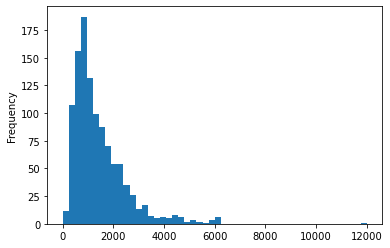

In [1066]:
df['IPTU R$'].plot(kind='hist', bins = 50) #a distribuição faz mais sentido também, agora parece com a real

### 3) Preenchendo os valores missing

In [1067]:
import numpy as np
cols = ["IPTU R$",'Condomínio R$']
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

In [1068]:
(df['Condomínio R$'].isnull().sum(),df['IPTU R$'].isnull().sum())

(215, 785)

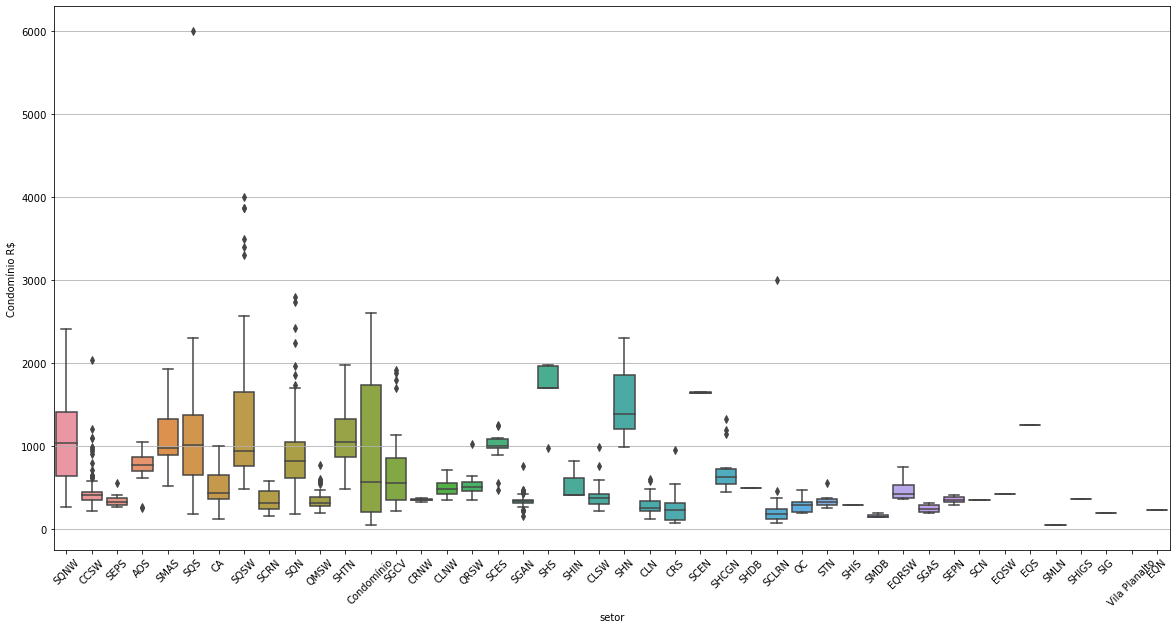

In [1069]:
plt.subplots(figsize = (20,10))
plt.grid()
plt.xticks(rotation = 45)
sns.boxplot(data = df, x = 'setor', y = 'Condomínio R$' ); #parece que faz sentido e realmente há muita variação entre os setores, podemos preencher com a mediana mas ainda vamos melhorar preenchendo pelo setor+band de area

In [1070]:
bins = [ 0,40,70,100,150,200]
df['areaband'] = np.searchsorted(bins, df['area'].values)

In [1071]:
df['setorareaband'] = df['setor'].astype(str) + '-' + df['areaband'].astype(str)

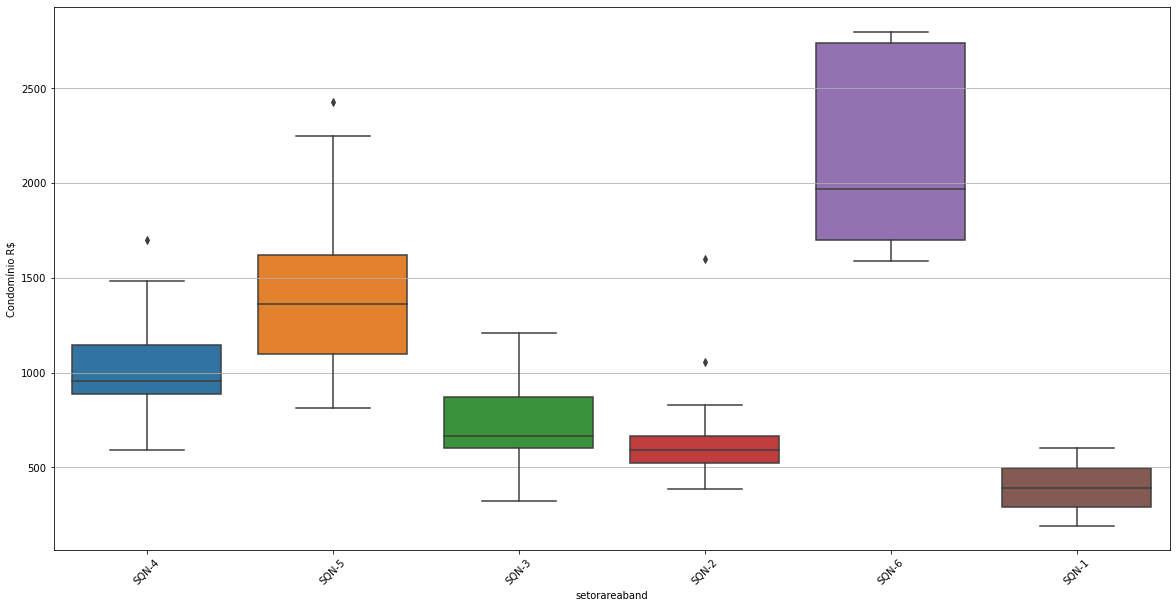

In [1072]:
df_norte = df.loc[df['setor'] == 'SQN']
plt.subplots(figsize = (20,10))
plt.grid()
plt.xticks(rotation = 45)
sns.boxplot(data = df_norte, x = 'setorareaband', y = 'Condomínio R$' ); #é gritante a variação do condomínio perante as bands na asa norte

In [1073]:
df['Condomínio R$'] = df['Condomínio R$'].fillna(df.groupby('setorareaband')['Condomínio R$'].transform('mean'))

In [1074]:
df['Condomínio R$'].isnull().sum()

16

In [1075]:
df['Condomínio R$'] = df['Condomínio R$'].fillna(df.groupby('areaband')['Condomínio R$'].transform('mean')) #para os que não tem média no areaband vamos usar a media da band de area

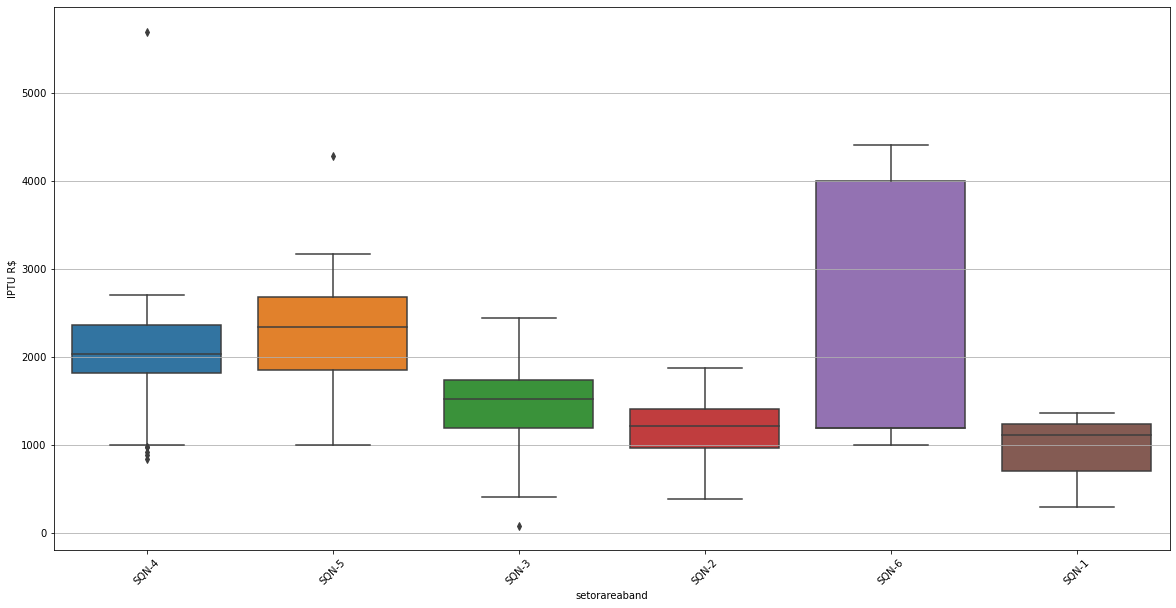

In [1076]:
df_norte = df.loc[df['setor'] == 'SQN']
plt.subplots(figsize = (20,10))
plt.grid()
plt.xticks(rotation = 45)
sns.boxplot(data = df_norte, x = 'setorareaband', y = 'IPTU R$' ); #visualizando só a asa norte pra ter uma dimensão da variação entre as bands do valor do iptu também

In [1077]:
df['IPTU R$'] = df['IPTU R$'].fillna(df.groupby('setorareaband')['IPTU R$'].transform('mean'))

In [1078]:
df[df['IPTU R$'].isnull()]

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea,areaband,setorareaband
5,SMAS Trecho 1 C,https://www.dfimoveis.com.br/imovel/apartamento-4-quartos-aluguel-park-sul-brasilia-df-smas-trecho-1-c-430221,15000,211,4.0,3.0,4.0,1931.000000,BRASÍLIA - PARK SUL,NaN,SMAS,NaN,6,SMAS-6
75,SQSW 100 Bloco D,https://www.dfimoveis.com.br/imovel/apartamento-1-quarto-aluguel-sudoeste-brasilia-df-sqsw-100-bloco-d-569321,1800,25,1.0,1.0,1.0,370.697847,BRASÍLIA - SUDOESTE,NaN,SQSW,NaN,1,SQSW-1
142,SMAS,https://www.dfimoveis.com.br/imovel/apartamento-3-quartos-aluguel-park-sul-brasilia-df-smas-523793,15000,211,3.0,3.0,4.0,1931.000000,BRASÍLIA - PARK SUL,NaN,SMAS,NaN,6,SMAS-6
187,SHDB QL 32 Comércio Local Bloco D,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-lago-sul-brasilia-df-shdb-ql-32-comercio-local-bloco-d-581236,3200,80,2.0,1.0,NaN,498.000000,BRASÍLIA - LAGO SUL,NaN,SHDB,NaN,3,SHDB-3
304,SGAN 914,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-asa-norte-brasilia-df-sgan-914-592591,800,630,1.0,NaN,1.0,2116.725925,BRASÍLIA - ASA NORTE,NaN,SGAN,NaN,6,SGAN-6
391,Área Especial 6/8,https://www.dfimoveis.com.br/imovel/apartamento-1-quarto-aluguel-octogonal-brasilia-df-area-especial-6-8-223865,1300,37,1.0,1.0,NaN,272.000000,BRASÍLIA - OCTOGONAL,NaN,AOS,NaN,1,AOS-1
442,EQRSW 7/8,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-sudoeste-brasilia-df-eqrsw-7-8-366473,4000,80,2.0,NaN,1.0,830.747372,BRASÍLIA - SUDOESTE,NaN,EQRSW,NaN,3,EQRSW-3
476,SHTN Trecho 1,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-asa-norte-brasilia-df-shtn-trecho-1-207725,8000,96,2.0,1.0,1.0,1973.500000,BRASÍLIA - ASA NORTE,NaN,SHTN,NaN,3,SHTN-3
522,Condomínio Jardim Botânico VI,https://www.dfimoveis.com.br/imovel/kitnet-1-quarto-aluguel-jardim-botanico-brasilia-df-condominio-jardim-botanico-vi-60797,1000,16,1.0,NaN,NaN,100.000000,BRASÍLIA - JARDIM BOTANICO,NaN,Condomínio,NaN,1,Condomínio-1
571,SHCGN 705 Bloco K,https://www.dfimoveis.com.br/imovel/apartamento-2-quartos-aluguel-asa-norte-brasilia-df-shcgn-705-bloco-k-65145,3200,75,2.0,NaN,NaN,736.000000,BRASÍLIA - ASA NORTE,NaN,SHCGN,NaN,3,SHCGN-3


In [1079]:
df['IPTU R$'] = df['IPTU R$'].fillna(df.groupby('areaband')['IPTU R$'].transform('mean')) #para os que não tem média no areaband vamos usar a media da band de area

In [1080]:
df[df['Quartos'].isnull()]

,name,link,price,area,Quartos,Suítes,Garagens,Condomínio R$,Cidade,IPTU R$,setor,iptuvsarea,areaband,setorareaband
342,SMDB Conjunto 12 BLOCO D,https://www.dfimoveis.com.br/imovel/kitnet-0-quartos-aluguel-lago-sul-brasilia-df-smdb-conjunto-12-314155,1000,22,NaN,NaN,NaN,152.0,BRASÍLIA - LAGO SUL,318.0,SMDB,2.409091,1,SMDB-1
718,SCLRN 707 Bloco C,https://www.dfimoveis.com.br/imovel/kitnet-0-quartos-aluguel-asa-norte-brasilia-df-sclrn-707-bloco-c-290156,950,33,NaN,NaN,NaN,100.0,BRASÍLIA - ASA NORTE,836.0,SCLRN,NaN,1,SCLRN-1
1848,SCRN 714/715,https://www.dfimoveis.com.br/imovel/kitnet-0-quartos-aluguel-asa-norte-brasilia-df-scrn-714-715-524579,700,33,NaN,NaN,NaN,200.0,BRASÍLIA - ASA NORTE,630.0,SCRN,3.181818,1,SCRN-1


In [1081]:
df['Quartos'] = df['Quartos'].fillna(df.groupby('setorareaband')['Quartos'].transform('median'))

### 4)Preparação final do dataset pra regressão

In [1082]:
df = pd.get_dummies(df, columns=['setor'])

In [1083]:
df['price'] = df['price'] + df['Condomínio R$'] + df['IPTU R$']/12

In [1084]:
cols = ['Cidade','Suítes','Garagens','link','iptuvsarea','areaband','setorareaband','name','Condomínio R$','IPTU R$']
df.drop(columns=cols,inplace=True)

In [1085]:
#from sklearn.preprocessing import StandardScaler
#features_scale = ['area','Quartos','Condomínio R$','IPTU R$']
#dados_numericos = df[features_scale]
#dados_numericos

In [1086]:
#scaled_features = StandardScaler().fit_transform(dados_numericos.values)
#dados_regressao = pd.DataFrame(scaled_features,index=dados_numericos.index,columns=dados_numericos.columns)

In [1087]:
#df_dummies = df.loc[:,'setor_AOS':]
#frames = [dados_regressao,df_dummies]
#df_regressao = pd.concat(frames, axis=1)

In [1088]:
#df_regressao

#### 5) Preparando uma regressão baseline

In [1089]:
from sklearn.model_selection import train_test_split
x = df.drop(columns = 'price')
Y = df.price
X_train, X_test, y_train, y_test = train_test_split(x, Y , test_size= 0.3,random_state=42)

In [1090]:
x

,area,Quartos,setor_AOS,setor_CA,setor_CCSW,setor_CLN,setor_CLNW,setor_CLSW,setor_CRNW,setor_CRS,...,setor_SIG,setor_SMAS,setor_SMDB,setor_SMLN,setor_SQN,setor_SQNW,setor_SQS,setor_SQSW,setor_STN,setor_Vila Planalto
0,32,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,26,1.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,75,3.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,164,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1877,28,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1878,67,2.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1879,100,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1880,21,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1091]:
import statsmodels.api as sm
X = X_train['area']
y = y_train
X = sm.add_constant(X)
olsmod = sm.OLS(y,X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     7.658
Date:                Thu, 04 Aug 2022   Prob (F-statistic):            0.00573
Time:                        15:08:52   Log-Likelihood:                -16451.
No. Observations:                1316   AIC:                         3.291e+04
Df Residuals:                    1314   BIC:                         3.292e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        437.7892   2863.547      0.153      0.8

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [1092]:
X_pred = X_test['area'].to_numpy()
X_pred = sm.add_constant(X_pred)
y_pred = olsres.predict(X_pred)
baseline_errors = abs(y_pred - y_test)
baseline_errors = pd.DataFrame(baseline_errors)
print(f'Erro médio da nossa regressão baseline (Em reais): {round(np.mean(baseline_errors),2)}');

Erro médio da nossa regressão baseline (Em reais): price    2782.05
dtype: float64


c:\Users\bruno\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [1093]:
def plotComparacao(y_test,y_pred,nomedaregressao):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    fig, ax = plt.subplots()
    fig.set_size_inches(20,10)   
    plt.scatter(range(len(y_test)), y_test, color = 'blue')
    plt.scatter(range(len(y_pred)), y_pred, color = 'red')
    plt.title(nomedaregressao, fontsize = 18)
    plt.xlabel('Nº da previsão')
    plt.ylabel('Preço de Venda')
    fig.legend(labels = ('Real','Previsões'),loc='upper left', fontsize = 16)
    plt.show()
    return

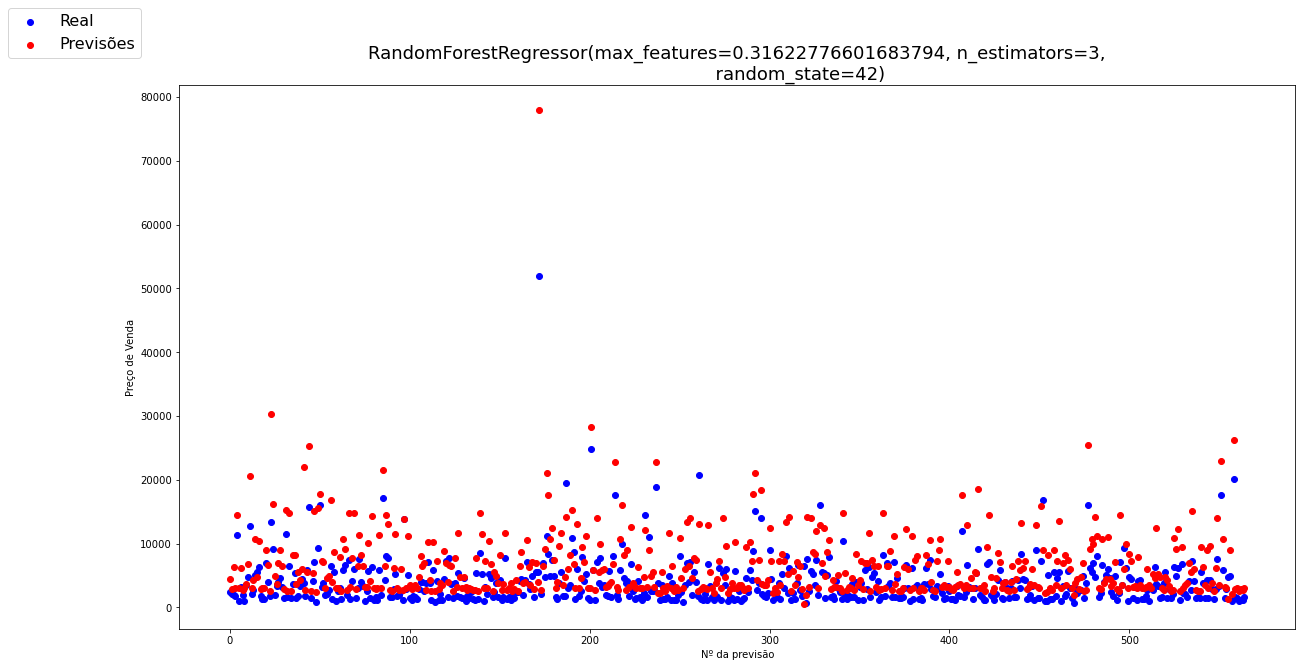

In [1094]:
plotComparacao(y_test,y_pred,regressor)

In [1095]:
import statsmodels.api as sm
X = X_train
y = y_train
X = sm.add_constant(X)
olsmod = sm.OLS(y,X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.677
Date:                Thu, 04 Aug 2022   Prob (F-statistic):            0.00432
Time:                        15:08:53   Log-Likelihood:                -16419.
No. Observations:                1316   AIC:                         3.293e+04
Df Residuals:                    1272   BIC:                         3.315e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.505e+04   6

c:\Users\bruno\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


In [1096]:
X_pred = X_test.to_numpy()
X_pred = sm.add_constant(X_pred)
y_pred = olsres.predict(X_pred)
baseline_errors = abs(y_pred - y_test)
baseline_errors = pd.DataFrame(baseline_errors)
print(f'Erro médio da nossa regressão baseline (Em reais): {round(np.mean(baseline_errors),2)}');

Erro médio da nossa regressão baseline (Em reais): price    6138.95
dtype: float64


c:\Users\bruno\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


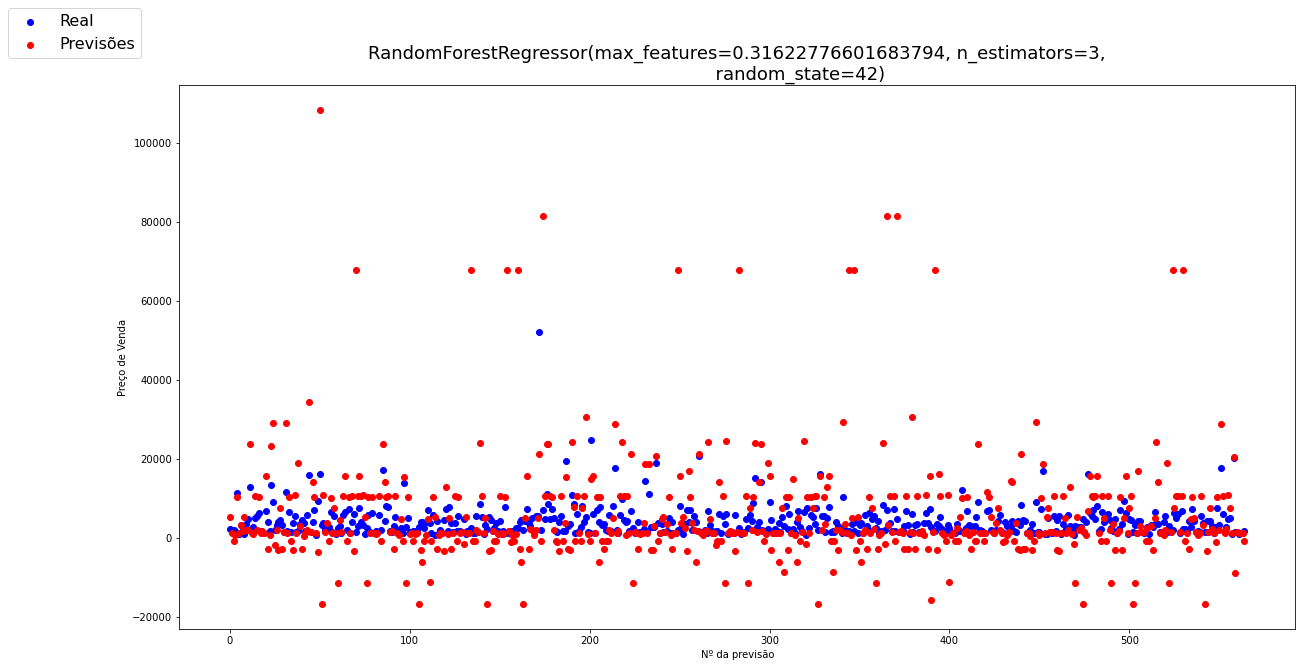

In [1097]:
plotComparacao(y_test,y_pred,regressor)

In [1098]:
y_train

1758    4766.400000
1340    4893.583333
208     1483.000000
1302    5688.500714
1471    6248.750000
           ...     
1130    1536.000000
1294    1111.459839
860     7142.500000
1459    3640.166667
1126    7434.432870
Name: price, Length: 1316, dtype: float64

In [1099]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa primeira regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa primeira regressão random forest é (Em reais): 1174.13


In [1100]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=3, random_state=42)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa primeira regressão random forest é (Em reais): {round(np.mean(erro),2)}');

Erro médio da nossa primeira regressão random forest é (Em reais): 988.63


In [1132]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=5, random_state=42,max_features=np.sqrt(0.1), min_samples_leaf=1)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
erro = abs(y_pred - y_test)
print(f'Erro médio da nossa primeira regressão random forest é (Em reais): {round(np.mean(erro),2)}');


Erro médio da nossa primeira regressão random forest é (Em reais): 912.92


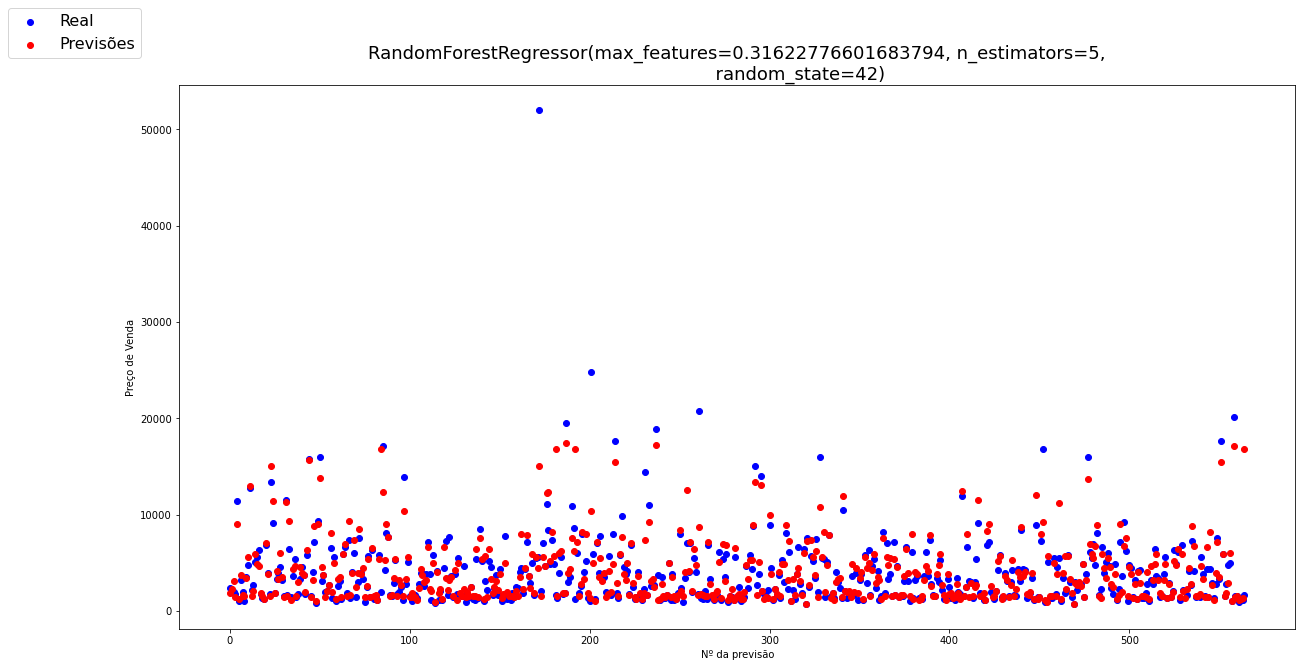

In [1133]:
plotComparacao(y_test,y_pred,regressor)

Portanto, este vai ser o nosso modelo final.